<a href="https://colab.research.google.com/github/dopters/dede/blob/master/notebooks/Getting_started_with_google_colab_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is making it easier than ever to integrate powerful Generative AI capabilities into your projects. We are launching public preview for a simple and intuitive Python library (google.colab.ai) to access state-of-the-art language models directly within Pro and Pro+ subscriber Colab environments.  This means subscribers can spend less time on configuration and set up and more time bringing their ideas to life. With just a few lines of code, you can now perform a variety of tasks:
- Generate text
- Translate languages
- Write creative content
- Categorize text

Happy Coding!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb)

=== MULTI-INDICATOR TRADING STRATEGY ANALYSIS ===

Strategy Logic:
• Strong Buy (2): Uptrend + RSI Oversold + MACD Bullish
• Buy (1): Uptrend + MACD Bullish
• Strong Sell (-2): Downtrend + RSI Overbought + MACD Bearish
• Sell (-1): Downtrend + MACD Bearish
• Hold (0): All other conditions

Generating sample stock data...
Calculating technical indicators...
Generating trading signals...
Calculating performance metrics...

Performance Statistics:
----------------------------------------
Total Strategy Return (%): -25.61
Total Market Return (%)  : 20.04
Strategy Volatility      : 0.0141
Market Volatility        : 0.0194
Strategy Sharpe Ratio    : -1.2133
Number of Signal Changes : 45
Win Rate (%)             : 38.28

Generating visualizations...


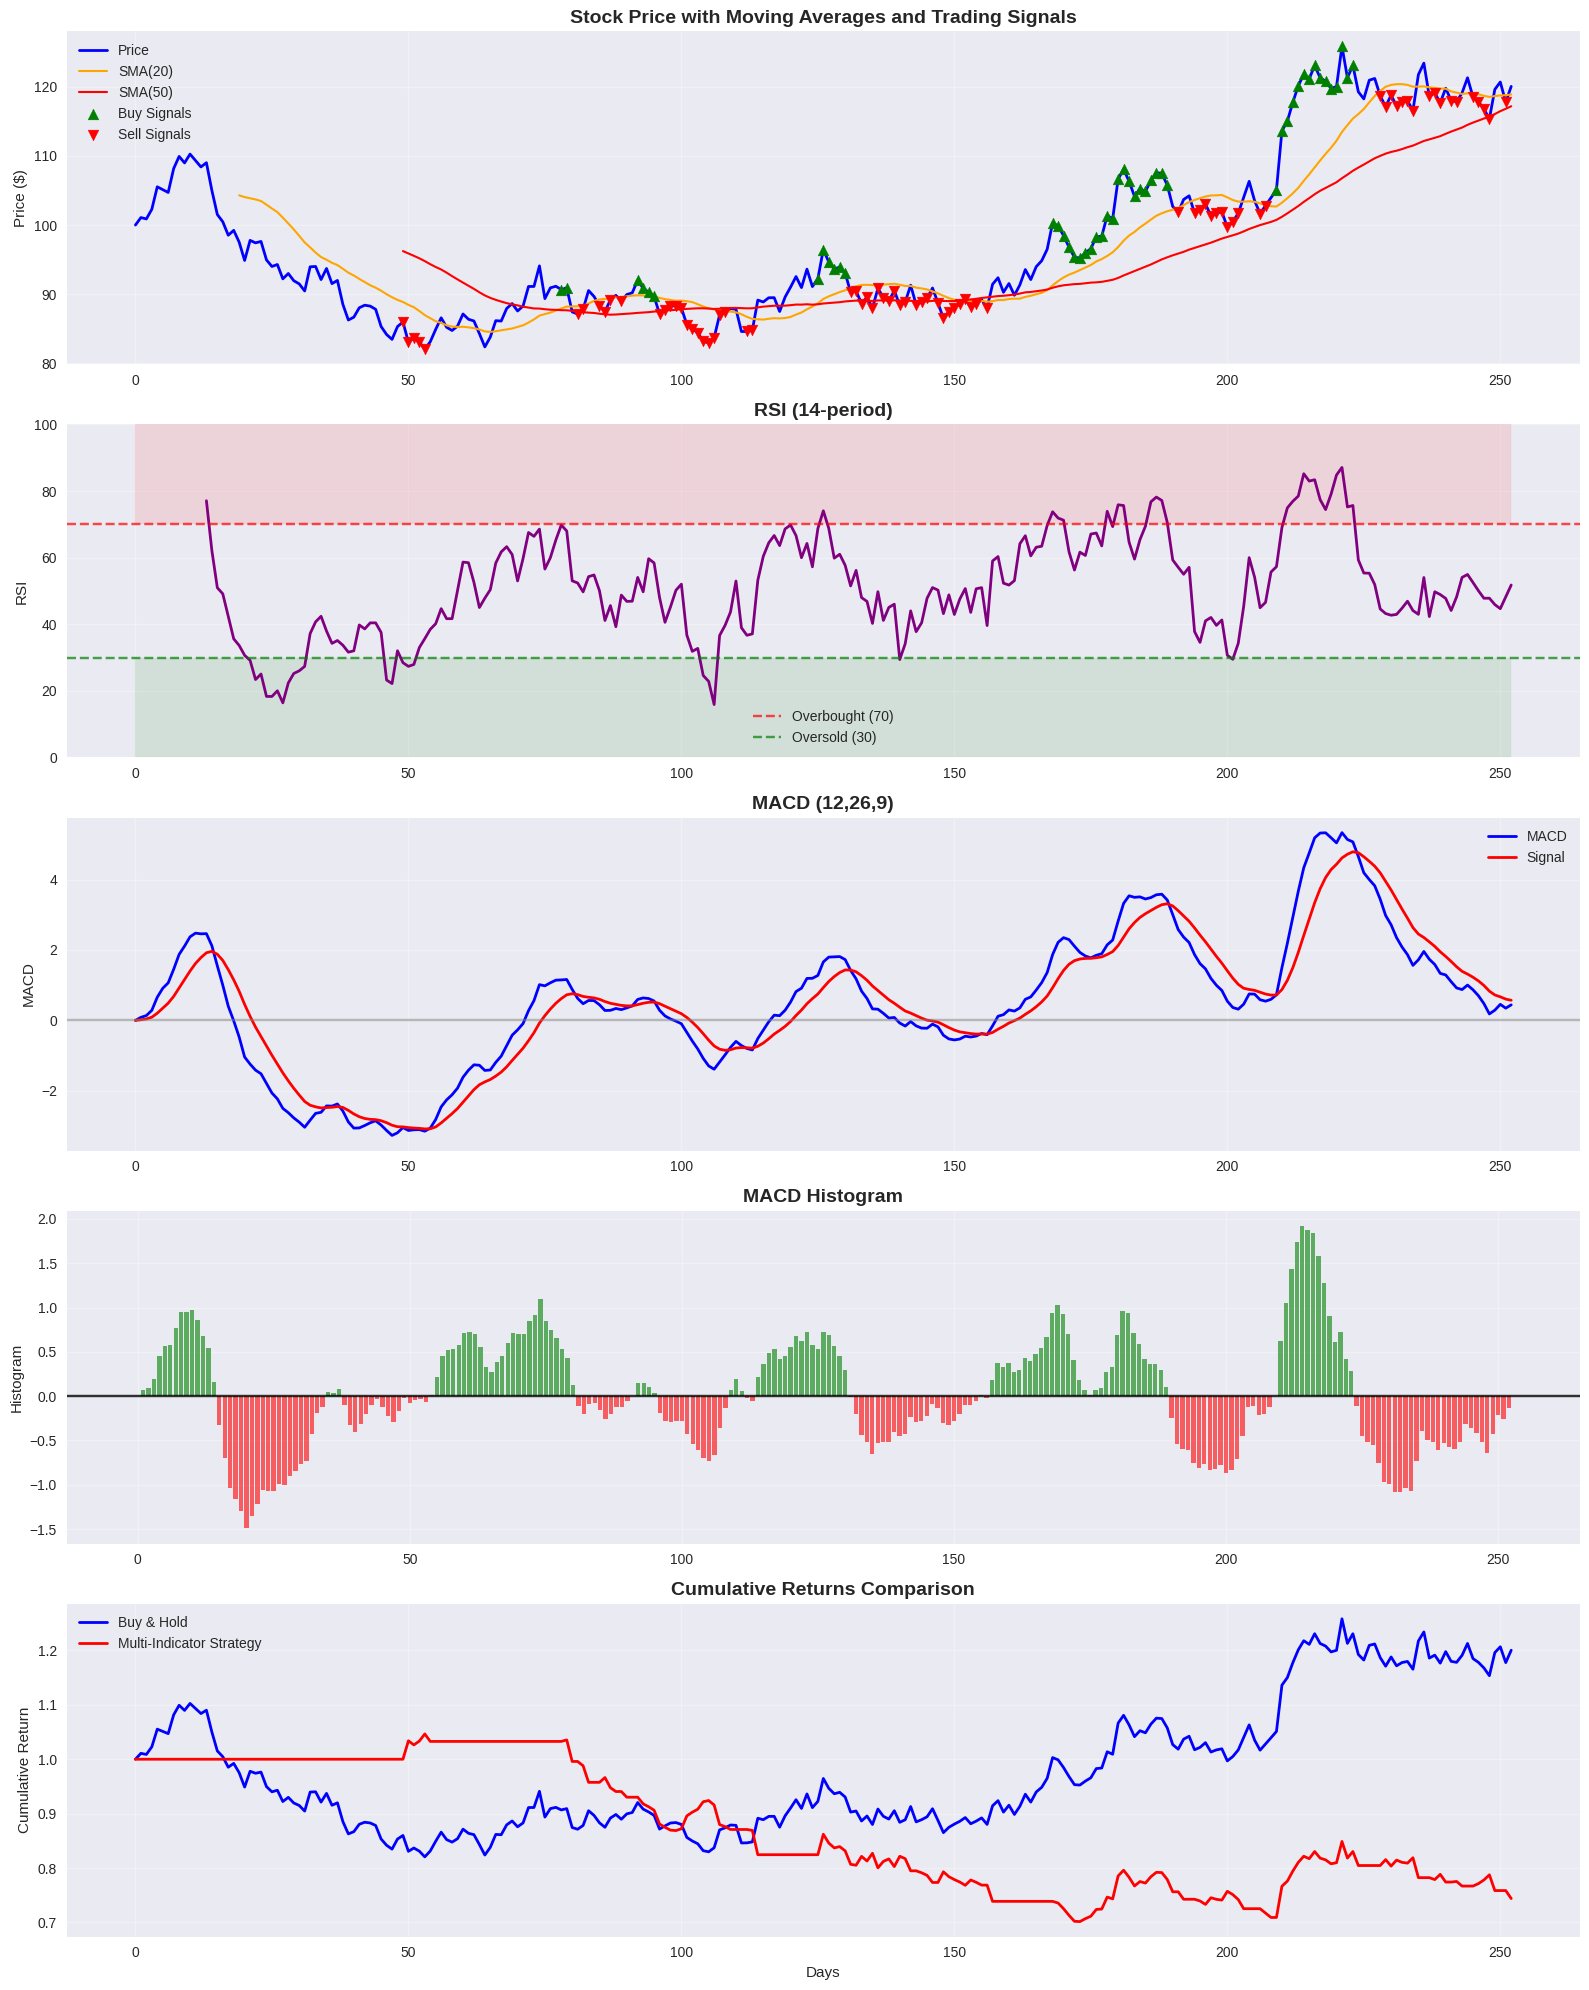

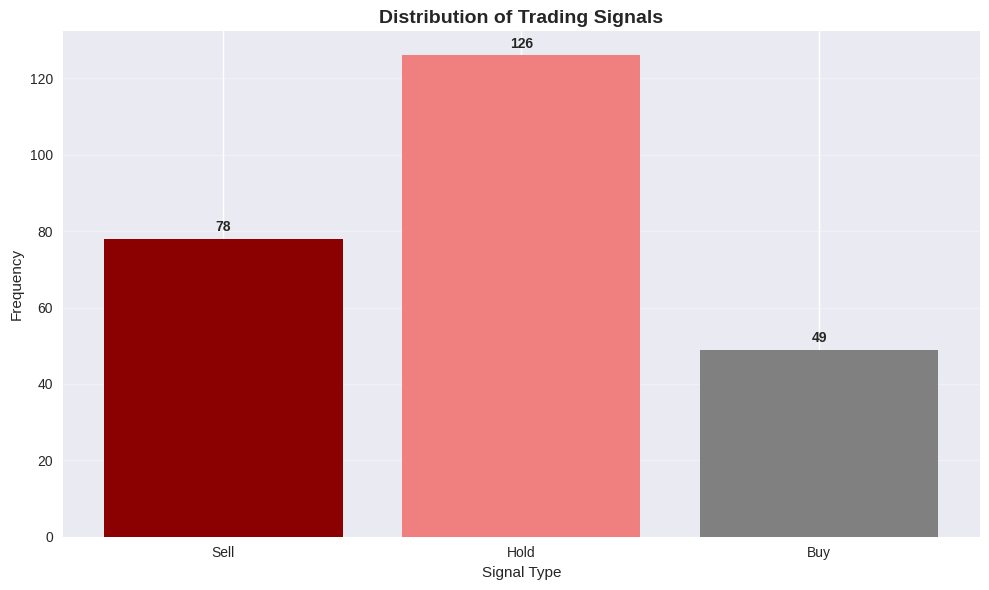


=== KEY INSIGHTS ===
Total trading days analyzed: 253
Days with buy signals: 49 (19.4%)
Days with sell signals: 78 (30.8%)
Days holding: 126 (49.8%)

High-conviction signals:
Strong buy days: 0 (0.0%)
Strong sell days: 0 (0.0%)


In [1]:
"""
Multi-Indicator Trading Strategy Analysis in Python
Combines Moving Averages, RSI, and MACD for trading signals
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TechnicalIndicators:
    """Class containing all technical indicator calculations"""

    @staticmethod
    def sma(data, period):
        """Simple Moving Average"""
        return data.rolling(window=period).mean()

    @staticmethod
    def ema(data, period):
        """Exponential Moving Average"""
        return data.ewm(span=period, adjust=False).mean()

    @staticmethod
    def rsi(data, period=14):
        """Relative Strength Index"""
        delta = data.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    @staticmethod
    def macd(data, fast=12, slow=26, signal=9):
        """MACD Calculation"""
        ema_fast = TechnicalIndicators.ema(data, fast)
        ema_slow = TechnicalIndicators.ema(data, slow)

        macd_line = ema_fast - ema_slow
        signal_line = TechnicalIndicators.ema(macd_line, signal)
        histogram = macd_line - signal_line

        return macd_line, signal_line, histogram

class TradingStrategy:
    """Multi-indicator trading strategy implementation"""

    def __init__(self, data):
        self.data = data.copy()
        self.signals = None
        self.indicators = {}

    def calculate_indicators(self):
        """Calculate all technical indicators"""
        prices = self.data['price']

        # Moving averages
        self.indicators['sma20'] = TechnicalIndicators.sma(prices, 20)
        self.indicators['sma50'] = TechnicalIndicators.sma(prices, 50)

        # RSI
        self.indicators['rsi'] = TechnicalIndicators.rsi(prices, 14)

        # MACD
        macd_line, signal_line, histogram = TechnicalIndicators.macd(prices, 12, 26, 9)
        self.indicators['macd_line'] = macd_line
        self.indicators['macd_signal'] = signal_line
        self.indicators['macd_hist'] = histogram

        # Add indicators to main dataframe
        for key, value in self.indicators.items():
            self.data[key] = value

    def generate_signals(self):
        """Generate trading signals based on multi-indicator logic"""
        signals = []

        for i in range(len(self.data)):
            # Get current values (handle NaN values)
            try:
                price = self.data['price'].iloc[i]
                sma20 = self.data['sma20'].iloc[i]
                sma50 = self.data['sma50'].iloc[i]
                rsi = self.data['rsi'].iloc[i]
                macd_line = self.data['macd_line'].iloc[i]
                macd_signal = self.data['macd_signal'].iloc[i]

                # Skip if any indicator is NaN
                if pd.isna([price, sma20, sma50, rsi, macd_line, macd_signal]).any():
                    signals.append(0)
                    continue

                # Define conditions
                trend_bull = price > sma20 and sma20 > sma50
                momentum_oversold = rsi < 30
                momentum_overbought = rsi > 70
                macd_bull = macd_line > macd_signal

                # Generate signals
                if trend_bull and momentum_oversold and macd_bull:
                    signal = 2  # Strong Buy
                elif trend_bull and macd_bull:
                    signal = 1  # Buy
                elif not trend_bull and momentum_overbought and not macd_bull:
                    signal = -2  # Strong Sell
                elif not trend_bull and not macd_bull:
                    signal = -1  # Sell
                else:
                    signal = 0  # Hold

                signals.append(signal)

            except (IndexError, KeyError):
                signals.append(0)

        self.data['signals'] = signals
        self.signals = signals
        return signals

    def calculate_performance(self):
        """Calculate strategy performance metrics"""
        # Calculate daily returns
        self.data['daily_returns'] = self.data['price'].pct_change()

        # Convert signals to positions (shift by 1 day for realistic trading)
        self.data['positions'] = self.data['signals'].shift(1).fillna(0)

        # Calculate strategy returns
        self.data['strategy_returns'] = self.data['positions'] * self.data['daily_returns']

        # Calculate cumulative returns
        self.data['cum_market_returns'] = (1 + self.data['daily_returns'].fillna(0)).cumprod()
        self.data['cum_strategy_returns'] = (1 + self.data['strategy_returns'].fillna(0)).cumprod()

        # Performance statistics
        total_strategy_return = (self.data['cum_strategy_returns'].iloc[-1] - 1) * 100
        total_market_return = (self.data['cum_market_returns'].iloc[-1] - 1) * 100

        strategy_volatility = self.data['strategy_returns'].std()
        market_volatility = self.data['daily_returns'].std()

        # Sharpe ratio (assuming 0% risk-free rate)
        strategy_sharpe = (self.data['strategy_returns'].mean() / strategy_volatility * np.sqrt(252)) if strategy_volatility > 0 else 0

        # Win rate
        winning_trades = (self.data['strategy_returns'] > 0).sum()
        total_trades = (self.data['strategy_returns'] != 0).sum()
        win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0

        # Number of signal changes
        signal_changes = (self.data['signals'].diff() != 0).sum()

        performance_stats = {
            'Total Strategy Return (%)': round(total_strategy_return, 2),
            'Total Market Return (%)': round(total_market_return, 2),
            'Strategy Volatility': round(strategy_volatility, 4),
            'Market Volatility': round(market_volatility, 4),
            'Strategy Sharpe Ratio': round(strategy_sharpe, 4),
            'Number of Signal Changes': signal_changes,
            'Win Rate (%)': round(win_rate, 2)
        }

        return performance_stats

def generate_sample_data(n_days=252, start_price=100, seed=42):
    """Generate sample stock price data"""
    np.random.seed(seed)

    # Generate random returns with slight positive drift
    returns = np.random.normal(0.0008, 0.02, n_days)

    # Create price series
    prices = [start_price]
    for ret in returns:
        prices.append(prices[-1] * np.exp(ret))

    # Create date range
    start_date = datetime.now() - timedelta(days=n_days)
    dates = [start_date + timedelta(days=i) for i in range(n_days + 1)]

    # Create DataFrame
    data = pd.DataFrame({
        'date': dates,
        'price': prices
    })

    return data

def create_visualizations(strategy):
    """Create comprehensive visualization of the trading strategy"""

    fig = plt.figure(figsize=(16, 20))

    # 1. Price chart with signals
    ax1 = plt.subplot(5, 1, 1)

    # Plot price and moving averages
    plt.plot(strategy.data.index, strategy.data['price'], 'b-', linewidth=2, label='Price')
    plt.plot(strategy.data.index, strategy.data['sma20'], 'orange', linewidth=1.5, label='SMA(20)')
    plt.plot(strategy.data.index, strategy.data['sma50'], 'red', linewidth=1.5, label='SMA(50)')

    # Add buy signals (green dots)
    buy_signals = strategy.data[strategy.data['signals'] >= 1]
    plt.scatter(buy_signals.index, buy_signals['price'], c='green', marker='^', s=60, label='Buy Signals', zorder=5)

    # Add sell signals (red dots)
    sell_signals = strategy.data[strategy.data['signals'] <= -1]
    plt.scatter(sell_signals.index, sell_signals['price'], c='red', marker='v', s=60, label='Sell Signals', zorder=5)

    plt.title('Stock Price with Moving Averages and Trading Signals', fontsize=14, fontweight='bold')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. RSI Chart
    ax2 = plt.subplot(5, 1, 2)
    plt.plot(strategy.data.index, strategy.data['rsi'], 'purple', linewidth=2)
    plt.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
    plt.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
    plt.fill_between(strategy.data.index, 70, 100, alpha=0.1, color='red')
    plt.fill_between(strategy.data.index, 0, 30, alpha=0.1, color='green')
    plt.title('RSI (14-period)', fontsize=14, fontweight='bold')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. MACD Chart
    ax3 = plt.subplot(5, 1, 3)
    plt.plot(strategy.data.index, strategy.data['macd_line'], 'blue', linewidth=2, label='MACD')
    plt.plot(strategy.data.index, strategy.data['macd_signal'], 'red', linewidth=2, label='Signal')
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    plt.title('MACD (12,26,9)', fontsize=14, fontweight='bold')
    plt.ylabel('MACD')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. MACD Histogram
    ax4 = plt.subplot(5, 1, 4)
    colors = ['red' if x < 0 else 'green' for x in strategy.data['macd_hist']]
    plt.bar(strategy.data.index, strategy.data['macd_hist'], color=colors, alpha=0.6, width=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    plt.title('MACD Histogram', fontsize=14, fontweight='bold')
    plt.ylabel('Histogram')
    plt.grid(True, alpha=0.3)

    # 5. Performance Comparison
    ax5 = plt.subplot(5, 1, 5)
    plt.plot(strategy.data.index, strategy.data['cum_market_returns'], 'blue', linewidth=2, label='Buy & Hold')
    plt.plot(strategy.data.index, strategy.data['cum_strategy_returns'], 'red', linewidth=2, label='Multi-Indicator Strategy')
    plt.title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Cumulative Return')
    plt.xlabel('Days')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Signal Distribution Chart
    plt.figure(figsize=(10, 6))
    signal_counts = Counter(strategy.signals)
    signal_labels = {-2: 'Strong Sell', -1: 'Sell', 0: 'Hold', 1: 'Buy', 2: 'Strong Buy'}

    labels = [signal_labels.get(k, f'Signal {k}') for k in sorted(signal_counts.keys())]
    values = [signal_counts[k] for k in sorted(signal_counts.keys())]
    colors = ['darkred', 'lightcoral', 'gray', 'lightgreen', 'darkgreen']

    plt.bar(labels, values, color=colors[:len(labels)])
    plt.title('Distribution of Trading Signals', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency')
    plt.xlabel('Signal Type')
    plt.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for i, v in enumerate(values):
        plt.text(i, v + max(values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

def main():
    """Main execution function"""
    print("=== MULTI-INDICATOR TRADING STRATEGY ANALYSIS ===\n")

    print("Strategy Logic:")
    print("• Strong Buy (2): Uptrend + RSI Oversold + MACD Bullish")
    print("• Buy (1): Uptrend + MACD Bullish")
    print("• Strong Sell (-2): Downtrend + RSI Overbought + MACD Bearish")
    print("• Sell (-1): Downtrend + MACD Bearish")
    print("• Hold (0): All other conditions\n")

    # Generate sample data
    print("Generating sample stock data...")
    data = generate_sample_data(n_days=252, start_price=100, seed=42)

    # Initialize strategy
    strategy = TradingStrategy(data)

    # Calculate indicators
    print("Calculating technical indicators...")
    strategy.calculate_indicators()

    # Generate signals
    print("Generating trading signals...")
    signals = strategy.generate_signals()

    # Calculate performance
    print("Calculating performance metrics...")
    performance_stats = strategy.calculate_performance()

    # Display performance statistics
    print("\nPerformance Statistics:")
    print("-" * 40)
    for metric, value in performance_stats.items():
        print(f"{metric:<25}: {value}")

    # Create visualizations
    print("\nGenerating visualizations...")
    create_visualizations(strategy)

    # Additional insights
    print("\n=== KEY INSIGHTS ===")
    signal_counts = Counter(signals)
    total_signals = len(signals)

    print(f"Total trading days analyzed: {total_signals}")
    print(f"Days with buy signals: {signal_counts.get(1, 0) + signal_counts.get(2, 0)} ({((signal_counts.get(1, 0) + signal_counts.get(2, 0))/total_signals*100):.1f}%)")
    print(f"Days with sell signals: {signal_counts.get(-1, 0) + signal_counts.get(-2, 0)} ({((signal_counts.get(-1, 0) + signal_counts.get(-2, 0))/total_signals*100):.1f}%)")
    print(f"Days holding: {signal_counts.get(0, 0)} ({(signal_counts.get(0, 0)/total_signals*100):.1f}%)")

    strong_buy_days = signal_counts.get(2, 0)
    strong_sell_days = signal_counts.get(-2, 0)
    print(f"\nHigh-conviction signals:")
    print(f"Strong buy days: {strong_buy_days} ({(strong_buy_days/total_signals*100):.1f}%)")
    print(f"Strong sell days: {strong_sell_days} ({(strong_sell_days/total_signals*100):.1f}%)")

    return strategy, performance_stats

if __name__ == "__main__":
    strategy, performance_stats = main()

In [2]:
# @title List available models
from google.colab import ai

ai.list_models()

['google/gemini-2.0-flash',
 'google/gemini-2.0-flash-lite',
 'google/gemini-2.5-flash',
 'google/gemini-2.5-flash-lite',
 'google/gemini-2.5-pro',
 'google/gemma-3-12b',
 'google/gemma-3-1b',
 'google/gemma-3-27b',
 'google/gemma-3-4b']

Choosing a Model
The model names give you a hint about their capabilities and intended use:

Pro: These are the most capable models, ideal for complex reasoning, creative tasks, and detailed analysis.

Flash: These models are optimized for high speed and efficiency, making them great for summarization, chat applications, and tasks requiring rapid responses.

Gemma: These are lightweight, open-weight models suitable for a variety of text generation tasks and are great for experimentation.

In [3]:
# @title Simple batch generation example
# Only text-to-text input/output is supported
from google.colab import ai

response = ai.generate_text("What is the capital of France?")
print(response)

APIStatusError: Error code: 402 - {'message': 'Colab Models is only available to Colab Pro and Pro+ subscribers.', 'type': 'invalid_request_error'}

In [ ]:
# @title Choose a different model
from google.colab import ai

response = ai.generate_text("What is the capital of England", model_name='google/gemini-2.0-flash-lite')
print(response)

For longer text generations, you can stream the response. This displays the output token by token as it's generated, rather than waiting for the entire response to complete. This provides a more interactive and responsive experience. To enable this, simply set stream=True.

In [ ]:
# @title Simple streaming example
from google.colab import ai

stream = ai.generate_text("Tell me a short story.", stream=True)
for text in stream:
  print(text, end='')

In [ ]:
#@title Text formatting setup
#code is not necessary for colab.ai, but is useful in fomatting text chunks
import sys

class LineWrapper:
    def __init__(self, max_length=80):
        self.max_length = max_length
        self.current_line_length = 0

    def print(self, text_chunk):
        i = 0
        n = len(text_chunk)
        while i < n:
            start_index = i
            while i < n and text_chunk[i] not in ' \n': # Find end of word
                i += 1
            current_word = text_chunk[start_index:i]

            delimiter = ""
            if i < n: # If not end of chunk, we found a delimiter
                delimiter = text_chunk[i]
                i += 1 # Consume delimiter

            if current_word:
                needs_leading_space = (self.current_line_length > 0)

                # Case 1: Word itself is too long for a line (must be broken)
                if len(current_word) > self.max_length:
                    if needs_leading_space: # Newline if current line has content
                        sys.stdout.write('\n')
                        self.current_line_length = 0
                    for char_val in current_word: # Break the long word
                        if self.current_line_length >= self.max_length:
                            sys.stdout.write('\n')
                            self.current_line_length = 0
                        sys.stdout.write(char_val)
                        self.current_line_length += 1
                # Case 2: Word doesn't fit on current line (print on new line)
                elif self.current_line_length + (1 if needs_leading_space else 0) + len(current_word) > self.max_length:
                    sys.stdout.write('\n')
                    sys.stdout.write(current_word)
                    self.current_line_length = len(current_word)
                # Case 3: Word fits on current line
                else:
                    if needs_leading_space:
                        # Define punctuation that should not have a leading space
                        # when they form an entire "word" (token) following another word.
                        no_leading_space_punctuation = {
                            ",", ".", ";", ":", "!", "?",        # Standard sentence punctuation
                            ")", "]", "}",                     # Closing brackets
                            "'s", "'S", "'re", "'RE", "'ve", "'VE", # Common contractions
                            "'m", "'M", "'ll", "'LL", "'d", "'D",
                            "n't", "N'T",
                            "...", "…"                          # Ellipses
                        }
                        if current_word not in no_leading_space_punctuation:
                            sys.stdout.write(' ')
                            self.current_line_length += 1
                    sys.stdout.write(current_word)
                    self.current_line_length += len(current_word)

            if delimiter == '\n':
                sys.stdout.write('\n')
                self.current_line_length = 0
            elif delimiter == ' ':
                # If line is full and a space delimiter arrives, it implies a wrap.
                if self.current_line_length >= self.max_length:
                    sys.stdout.write('\n')
                    self.current_line_length = 0

        sys.stdout.flush()


In [ ]:
# @title Formatted streaming example
from google.colab import ai

wrapper = LineWrapper()
for chunk in ai.generate_text('Give me a long winded description about the evolution of the Roman Empire.', model_name='google/gemini-2.0-flash', stream=True):
  wrapper.print(chunk)